Question 1

In [1]:
import pandas as pd
data=pd.read_csv("data_cleaning.csv", delimiter=",", encoding="UTF-8")
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,Obesity_Level
0,0,0.347334,0.425000,0.323992,yes,no,0.5,0.608968,Sometimes,0,...,0,1,0,1,0,0,0,0,0,NObeyesdad_Normal_Weight
1,0,0.347334,0.175000,0.220315,yes,no,1.0,0.608968,Sometimes,1,...,0,1,0,1,0,0,0,0,0,NObeyesdad_Normal_Weight
2,1,0.570802,0.875000,0.492468,yes,no,0.5,0.608968,Sometimes,0,...,0,1,0,1,0,0,0,0,0,NObeyesdad_Normal_Weight
3,1,1.000000,0.875000,0.622065,no,no,1.0,0.608968,Sometimes,0,...,0,0,1,0,0,0,0,1,0,NObeyesdad_Overweight_Level_I
4,1,0.459068,0.825000,0.658352,no,no,0.5,0.000000,Sometimes,0,...,0,1,0,0,0,0,0,0,1,NObeyesdad_Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0.344746,0.651825,1.000000,yes,yes,1.0,0.608968,Sometimes,0,...,0,1,0,0,0,0,1,0,0,NObeyesdad_Obesity_Type_III
2107,0,0.457162,0.746460,1.000000,yes,yes,1.0,0.608968,Sometimes,0,...,0,1,0,0,0,0,1,0,0,NObeyesdad_Obesity_Type_III
2108,0,0.517621,0.755515,1.000000,yes,yes,1.0,0.608968,Sometimes,0,...,0,1,0,0,0,0,1,0,0,NObeyesdad_Obesity_Type_III
2109,0,0.722977,0.723625,1.000000,yes,yes,1.0,0.608968,Sometimes,0,...,0,1,0,0,0,0,1,0,0,NObeyesdad_Obesity_Type_III


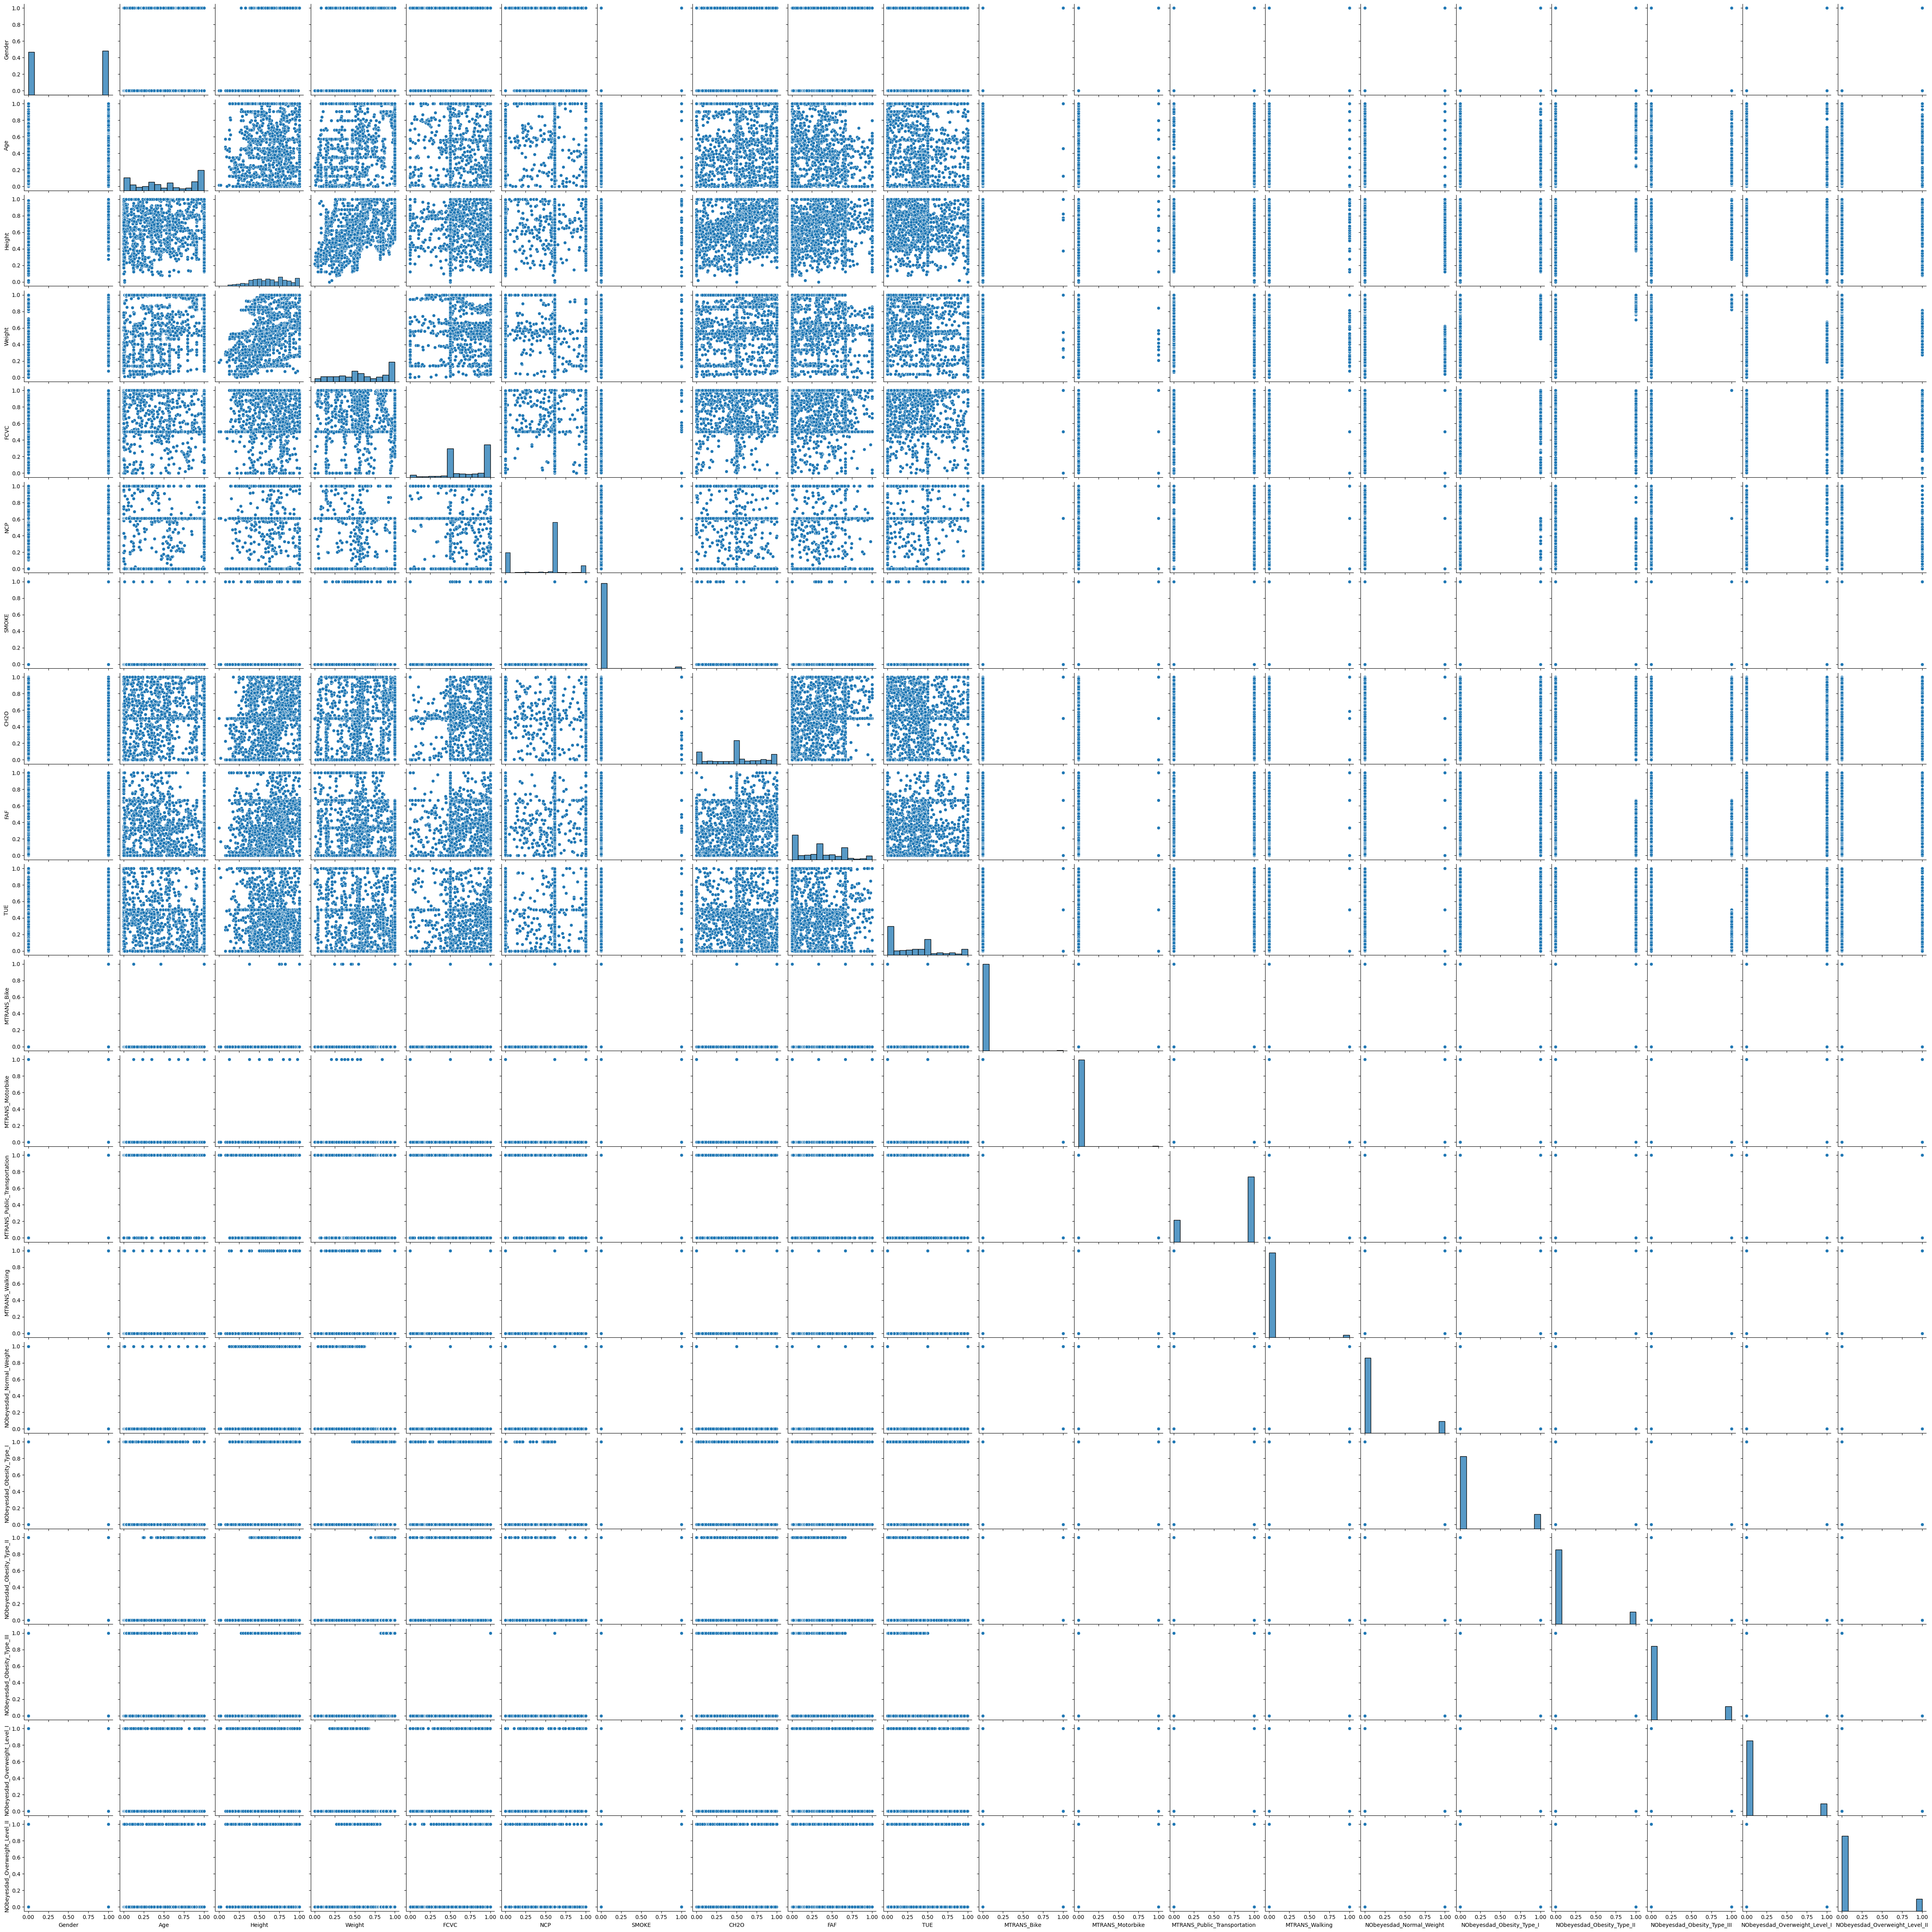

In [2]:
# Create pair plots
import seaborn as sns
sns.pairplot(data)


In [3]:
#correlation Age VS Height
correlation = data['Age'].corr(data['Height'])
print(correlation)


0.011671547807575774


In [4]:
correlation = data['Gender'].corr(data['Height'])
print(correlation)

0.6220669886350303


<Figure size 1000x600 with 0 Axes>

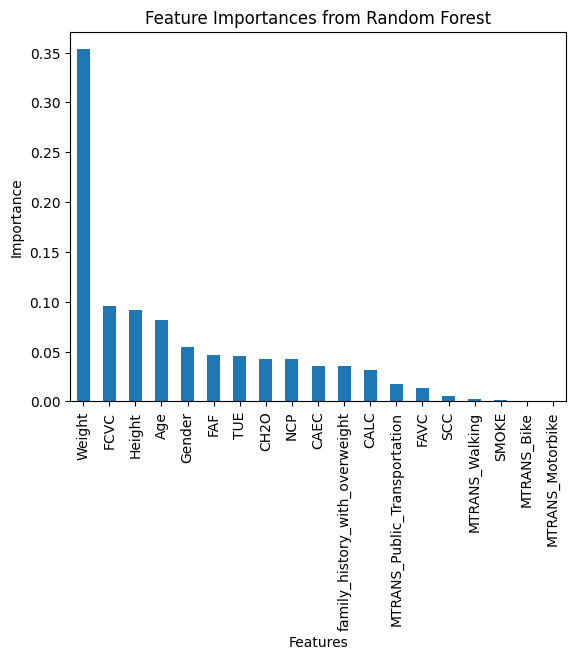

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd


# Define X and y
X = data.drop(['Obesity_Level', 'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I','NObeyesdad_Overweight_Level_II','NObeyesdad_Normal_Weight'], axis=1)  # Features (all columns except 'target')
y = data['Obesity_Level']  # Target variable

# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:  # Select categorical columns
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])  # Transform the column
    label_encoders[column] = le  # Store the encoder for future use

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Extracting feature importance
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

plt.figure(figsize=(10, 6))
importance_df.sort_values(by='Importance', ascending=False).plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()



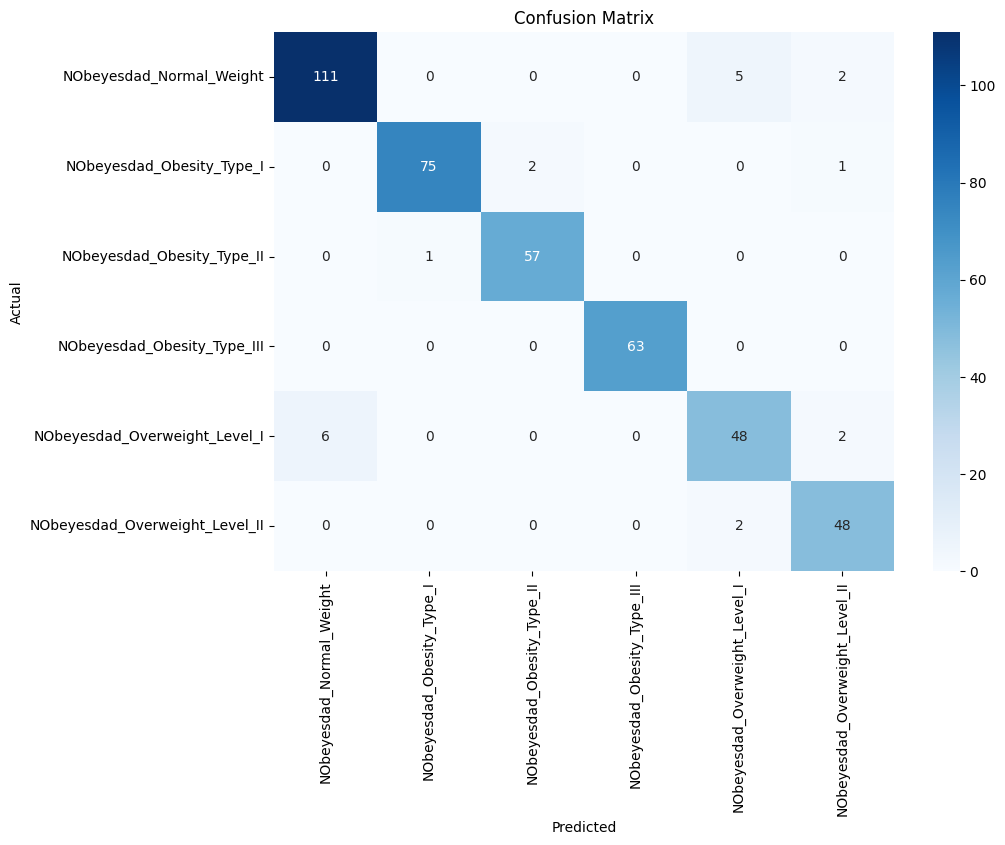

In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Make predictions
y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Question 3

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# Define X and y
X = data[['Weight','Height','FCVC','Age','Gender']]
y = data['Obesity_Level']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# evaluation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

accuracy = model.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.4f}")


                                precision    recall  f1-score   support

      NObeyesdad_Normal_Weight       0.98      0.97      0.98       118
     NObeyesdad_Obesity_Type_I       0.97      0.95      0.96        78
    NObeyesdad_Obesity_Type_II       0.95      0.97      0.96        58
   NObeyesdad_Obesity_Type_III       1.00      1.00      1.00        63
 NObeyesdad_Overweight_Level_I       0.93      0.95      0.94        56
NObeyesdad_Overweight_Level_II       0.96      0.98      0.97        50

                      accuracy                           0.97       423
                     macro avg       0.97      0.97      0.97       423
                  weighted avg       0.97      0.97      0.97       423

Test set accuracy: 0.9693


 Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import pandas as pd

# Define X and y
X_reg = data[['Weight', 'Height', 'FCVC', 'Age', 'Gender']]  # Uses multiple features
y_reg = data['Obesity_Level']  # target

# Split into training and test data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

# Define and train the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter to avoid convergence issues
model.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = model.predict(X_test_reg)

# Print classification report
print(classification_report(y_test_reg, y_pred_reg))

# Calculate accuracy
accuracy = model.score(X_test_reg, y_test_reg)
print(f"Test set accuracy: {accuracy:.4f}")


                                precision    recall  f1-score   support

      NObeyesdad_Normal_Weight       1.00      0.96      0.98       118
     NObeyesdad_Obesity_Type_I       0.93      0.87      0.90        78
    NObeyesdad_Obesity_Type_II       0.85      0.98      0.91        58
   NObeyesdad_Obesity_Type_III       1.00      1.00      1.00        63
 NObeyesdad_Overweight_Level_I       0.76      0.89      0.82        56
NObeyesdad_Overweight_Level_II       0.85      0.70      0.77        50

                      accuracy                           0.91       423
                     macro avg       0.90      0.90      0.90       423
                  weighted avg       0.92      0.91      0.91       423

Test set accuracy: 0.9125


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

X_g = data[['Weight', 'Height', 'FCVC', 'Age', 'Gender']]
y_g = data['Obesity_Level']

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_g, y_g, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_g = scaler.fit_transform(X_train_g)
X_test_g = scaler.transform(X_test_g)

# Define the logistic regression model
model = LogisticRegression(max_iter=1000)

# Define the grid of hyperparameters to test
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with GridSearchCV
grid_search.fit(X_train_g, y_train_g)

# Getting the best settings
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Predict with the best model
y_pred_g = grid_search.predict(X_test_g)

# Print the classification report
print(classification_report(y_test_g, y_pred_g))

# Calculate accuracy
accuracy = grid_search.score(X_test_g, y_test_g)
print(f"Test set accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
                                precision    recall  f1-score   support

      NObeyesdad_Normal_Weight       0.99      0.98      0.99       118
     NObeyesdad_Obesity_Type_I       0.97      0.96      0.97        78
    NObeyesdad_Obesity_Type_II       0.95      1.00      0.97        58
   NObeyesdad_Obesity_Type_III       1.00      1.00      1.00        63
 NObeyesdad_Overweight_Level_I       0.91      0.95      0.93        56
NObeyesdad_Overweight_Level_II       0.96      0.90      0.93        50

                      accuracy                           0.97       423
                     macro avg       0.96      0.97      0.96       423
                  weighted avg       0.97      0.97      0.97       423

Test set accuracy: 0.9693


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


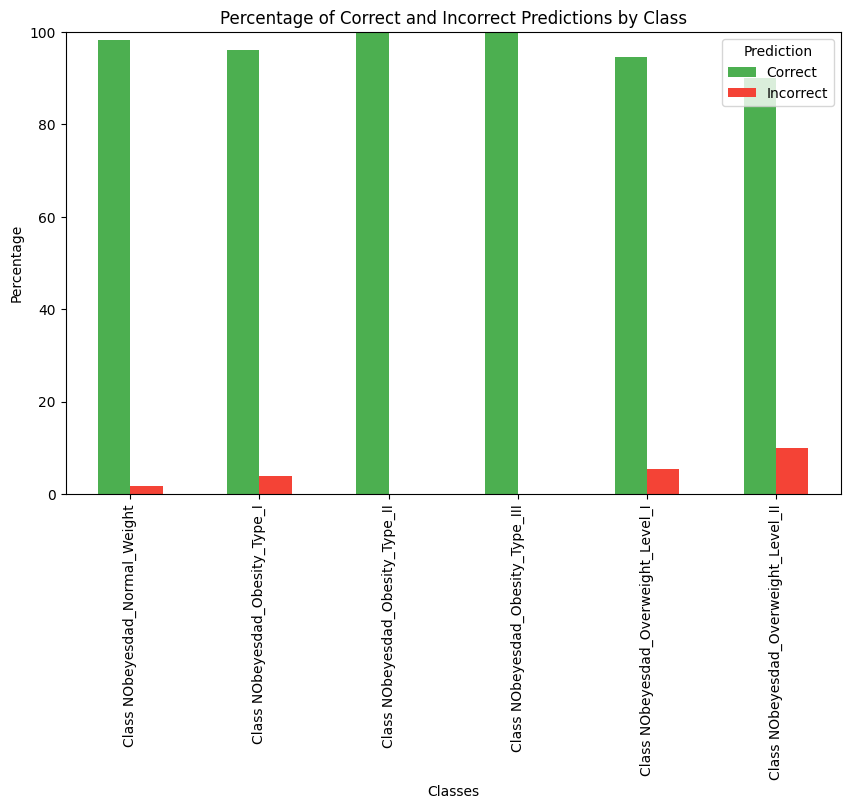

In [21]:
import numpy as np
# Confusion Matrix
cm = confusion_matrix(y_test_g, y_pred_g)

# Calculation of correct and incorrect percentages by class.
class_labels = np.unique(y_g)  # Getting unique classes.
correct = cm.diagonal()  # Correct predictions.
incorrect = cm.sum(axis=1) - correct  # Incorrect predictions.

# Calculation of percentages.
total_predictions = cm.sum(axis=1)
correct_percentage = (correct / total_predictions) * 100
incorrect_percentage = (incorrect / total_predictions) * 100

# Creating a DataFrame for easier visualization.
results_df = pd.DataFrame({
    'Class': [f'Class {label}' for label in class_labels],
    'Correct': correct_percentage,
    'Incorrect': incorrect_percentage
})

# Visualization with a bar chart.
results_df.set_index('Class').plot(kind='bar', figsize=(10, 6), color=['#4CAF50', '#F44336'])
plt.title('Percentage of Correct and Incorrect Predictions by Class')
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Prediction', labels=['Correct', 'Incorrect'])
plt.ylim(0, 100)  # Y-axis limit from 0 to 100 for percentage.
plt.xticks(rotation=90)
plt.show()